<a href="https://colab.research.google.com/github/vamsyvijay/OIBSIP/blob/main/Sales_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We have the Data of an Advertising company which the data is about the advertising amount spent  on the category and the sales they recieved. Lets make a prediction model.

#import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split

#Load the Data

In [ ]:
df = pd.read_csv("/content/Advertising.csv")

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


# Preprocessing and cleaning the data

In [ ]:
#since the data we have is almost in a clear format with having all the numerical columns.
# we just have to drop the unnecessary columns in the table
df.drop('Unnamed: 0', axis =1 , inplace =True)

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#EDA (Exploratory Data Analysis)

In [ ]:
df.shape

(200, 4)

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Data Visualization

In [ ]:
px.scatter(df,x=["TV",'Radio','Newspaper'],y='Sales')

In [ ]:
px.pie(df,names=df.columns,values=[round(sum(df[i])) for i in df])
# The portion of each column contributing in the data

In [ ]:
!pip install autoviz

In [ ]:
%matplotlib inline

Shape of your Data Set loaded: (200, 4)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    3 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Regression problem #####################


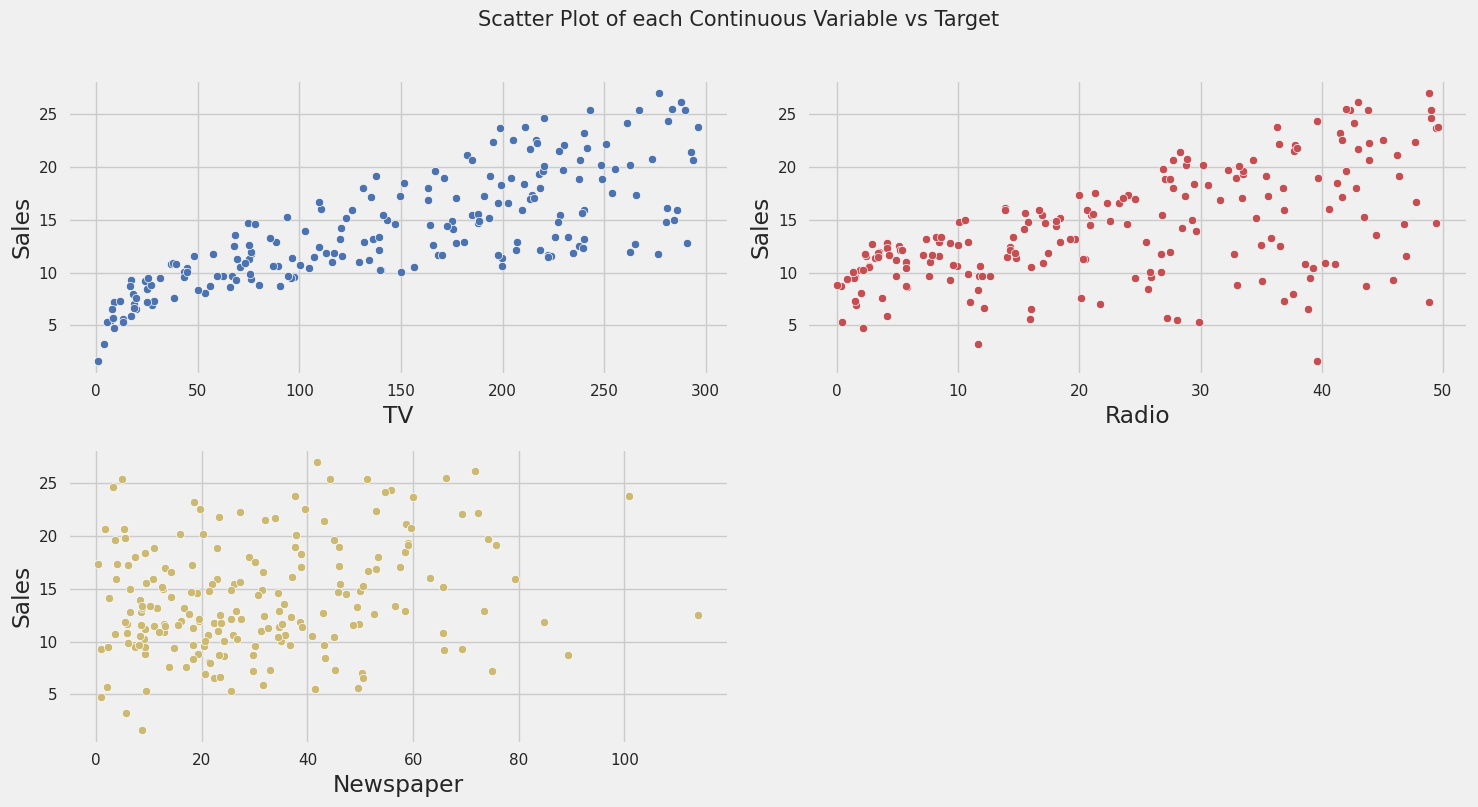

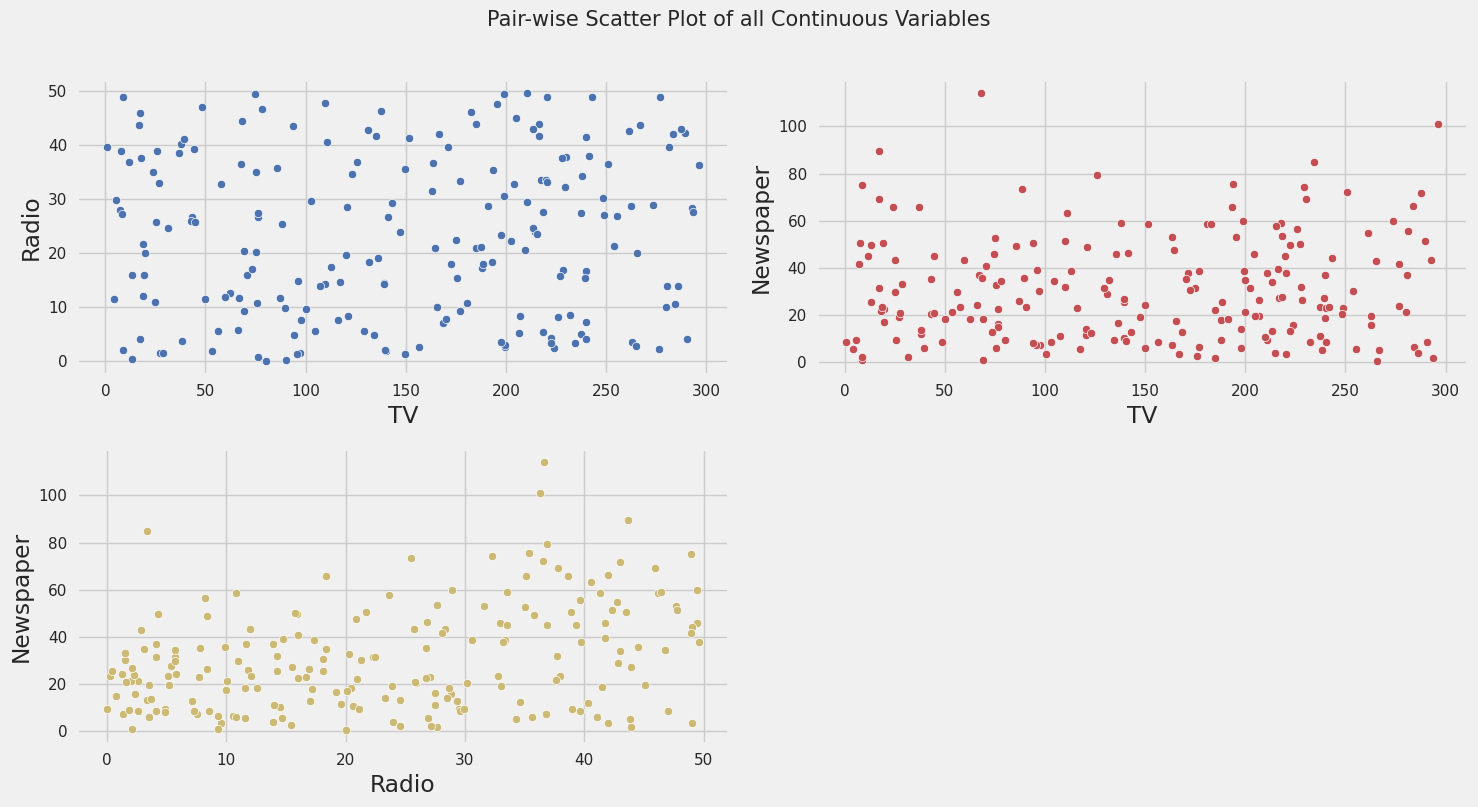

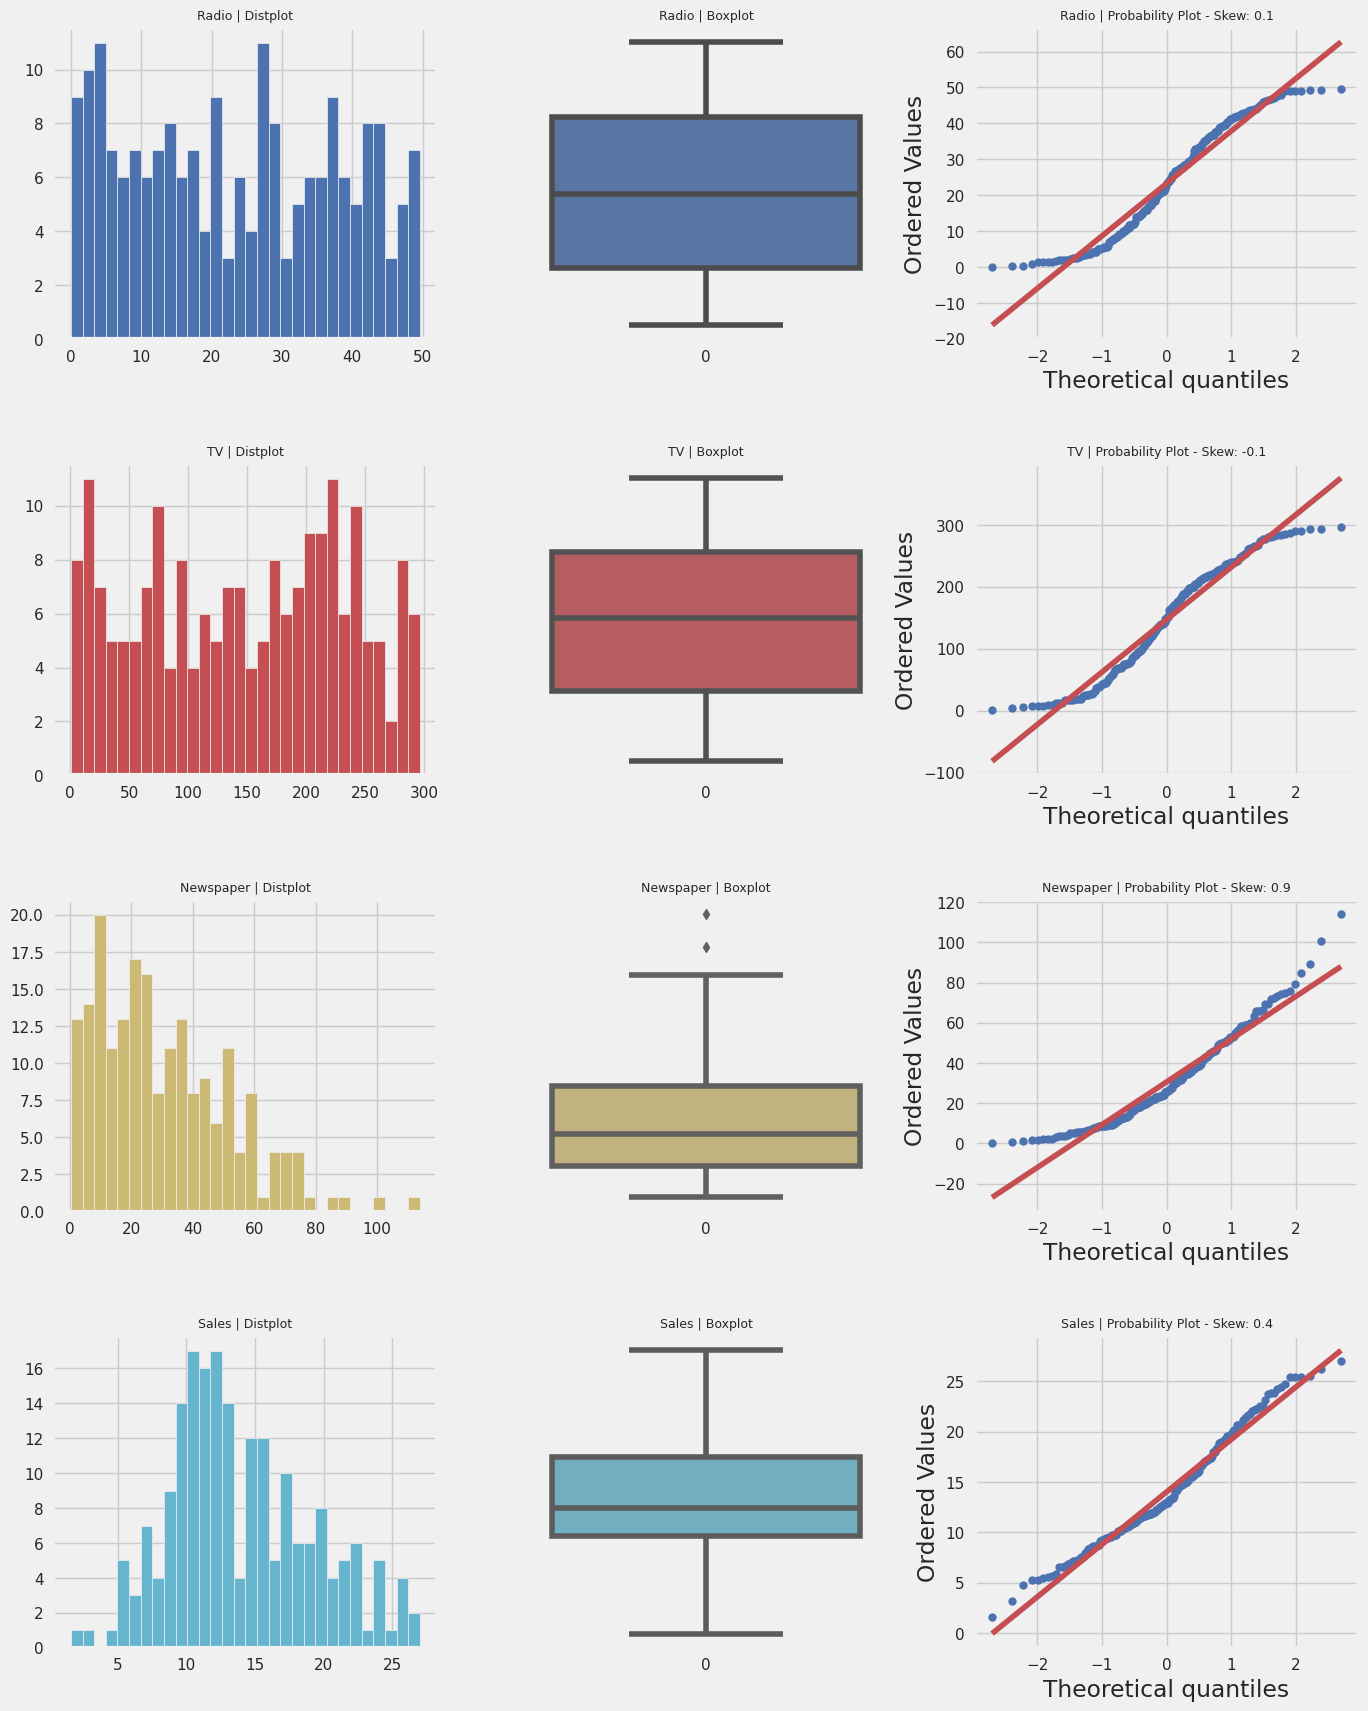

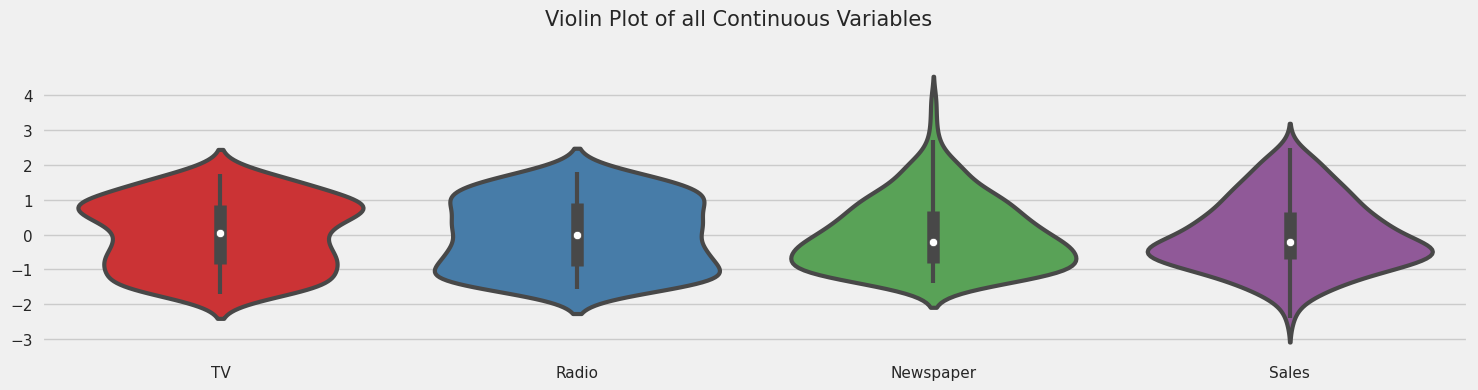

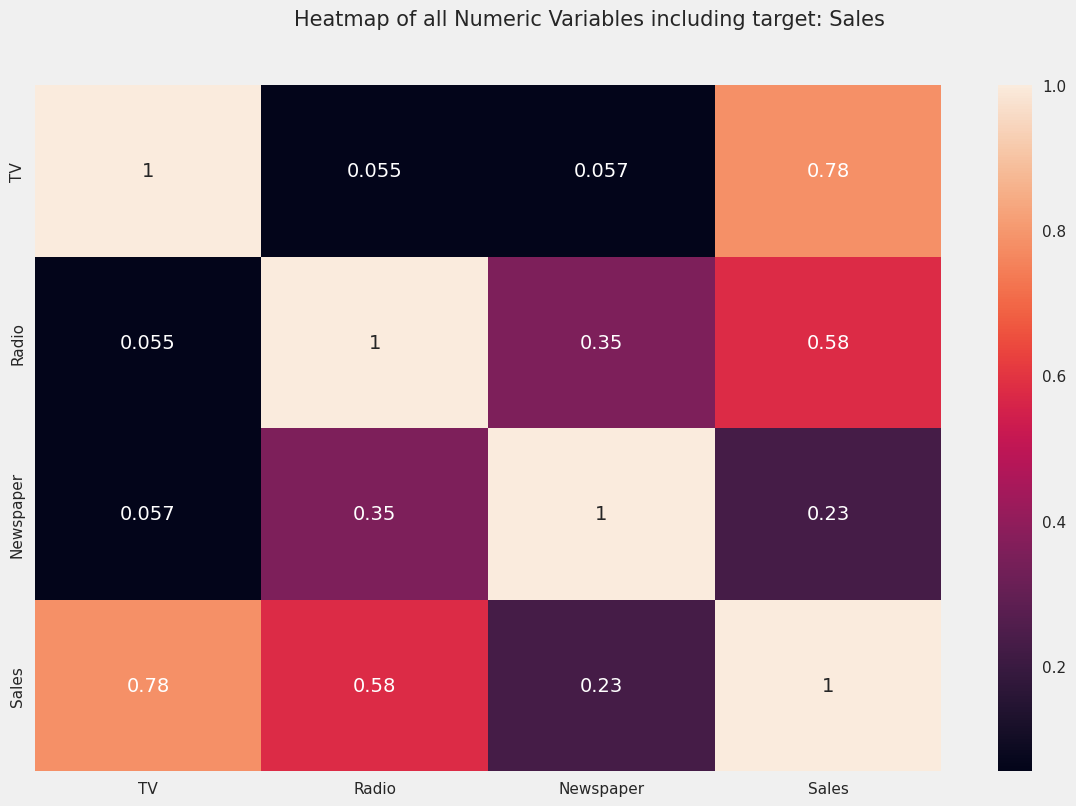

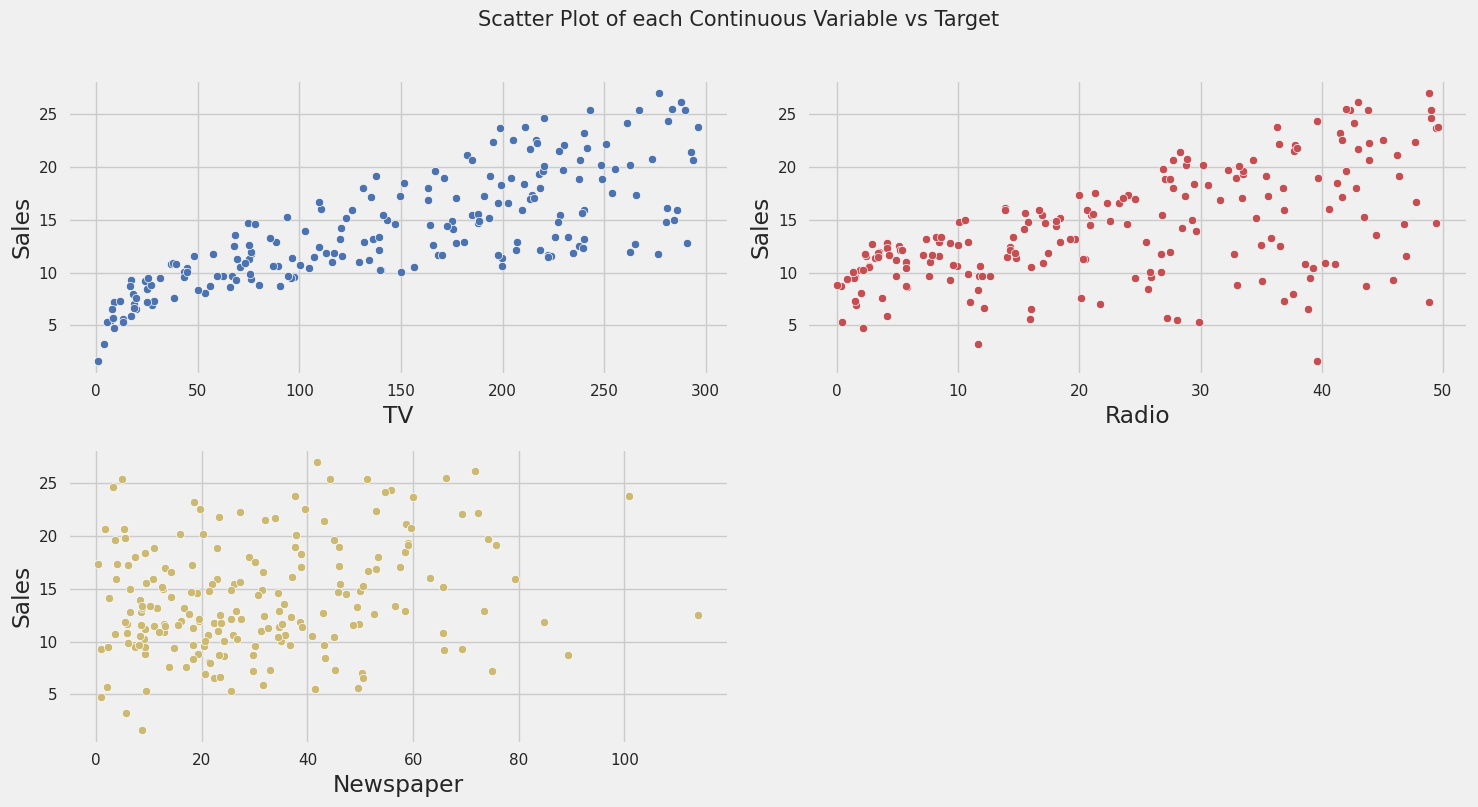

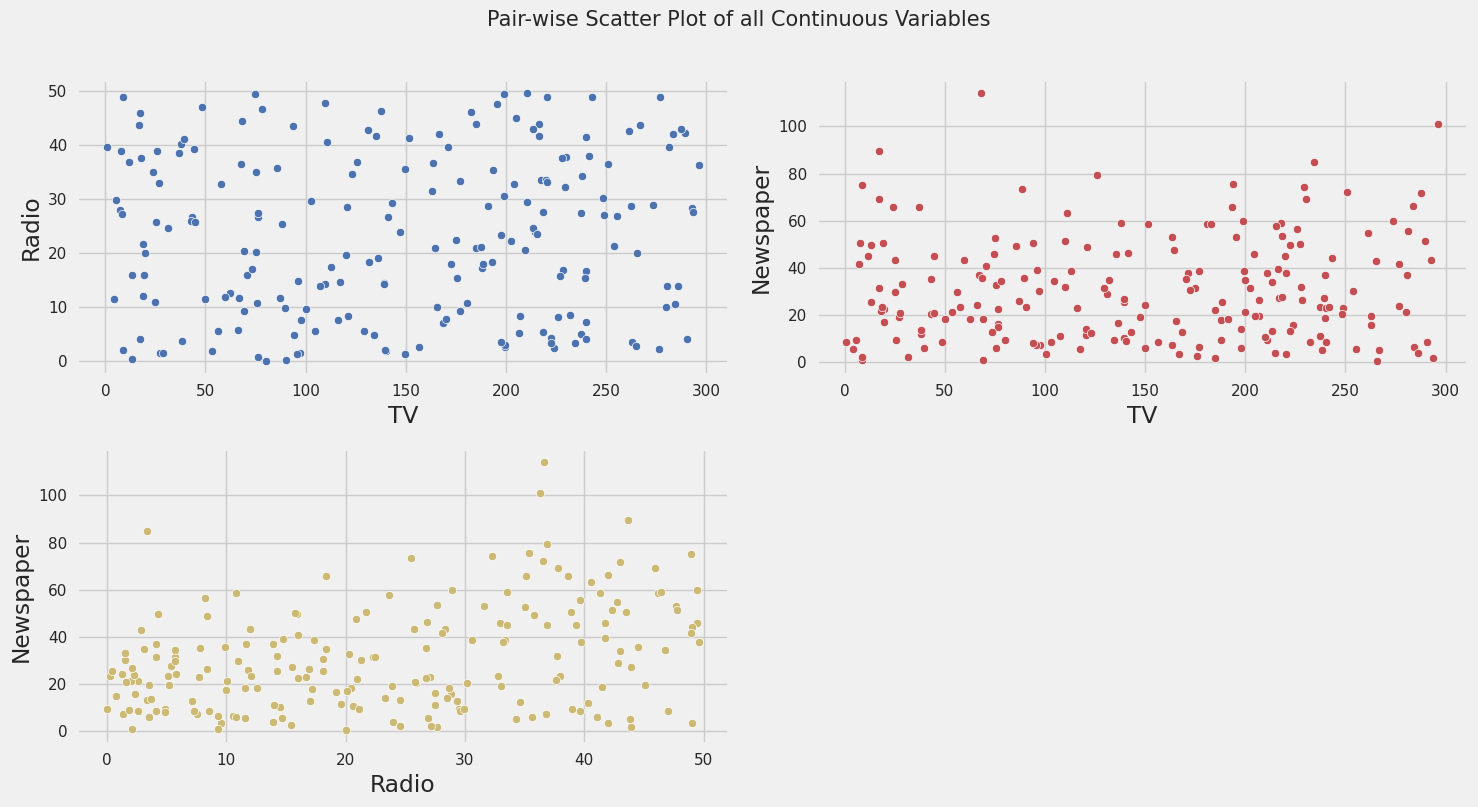

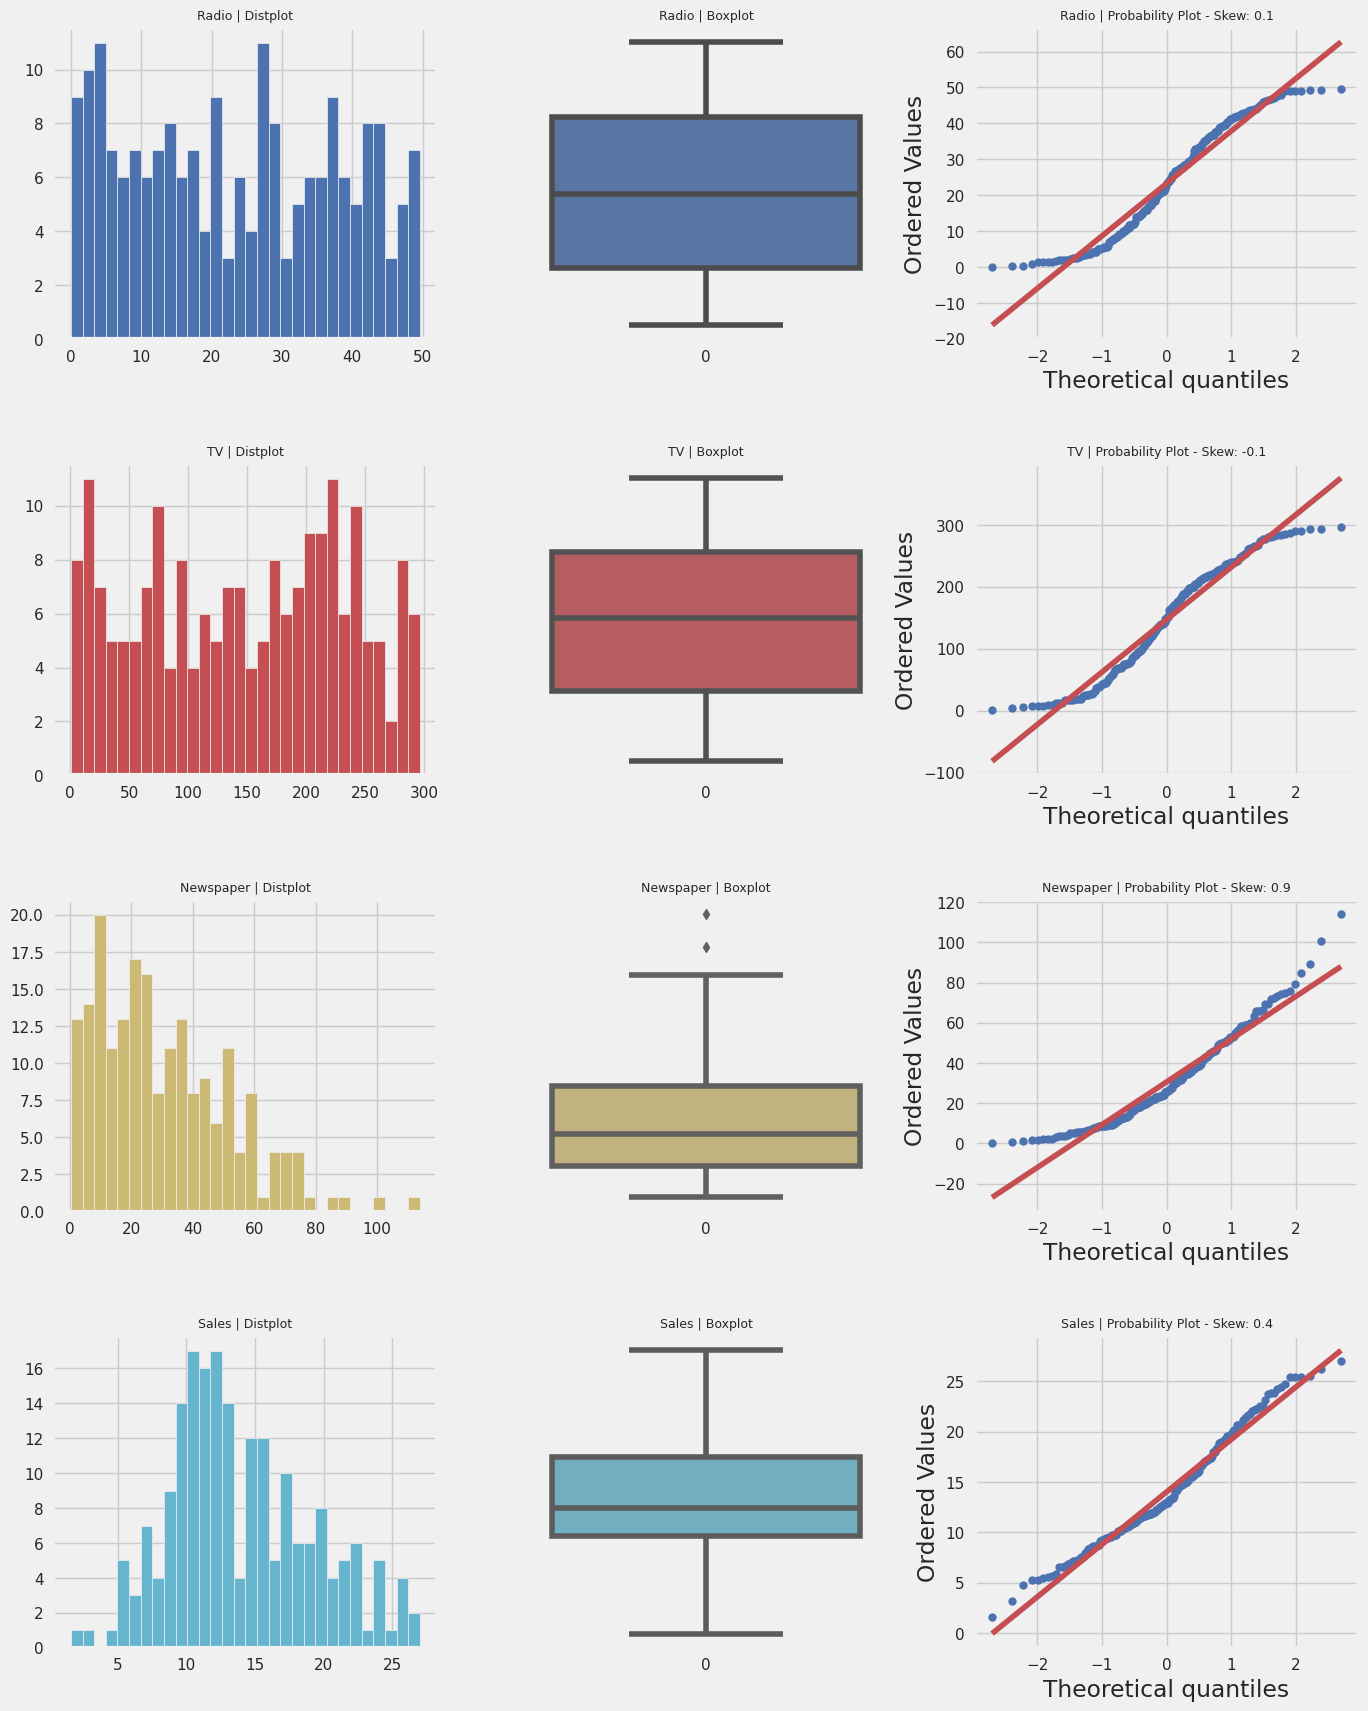

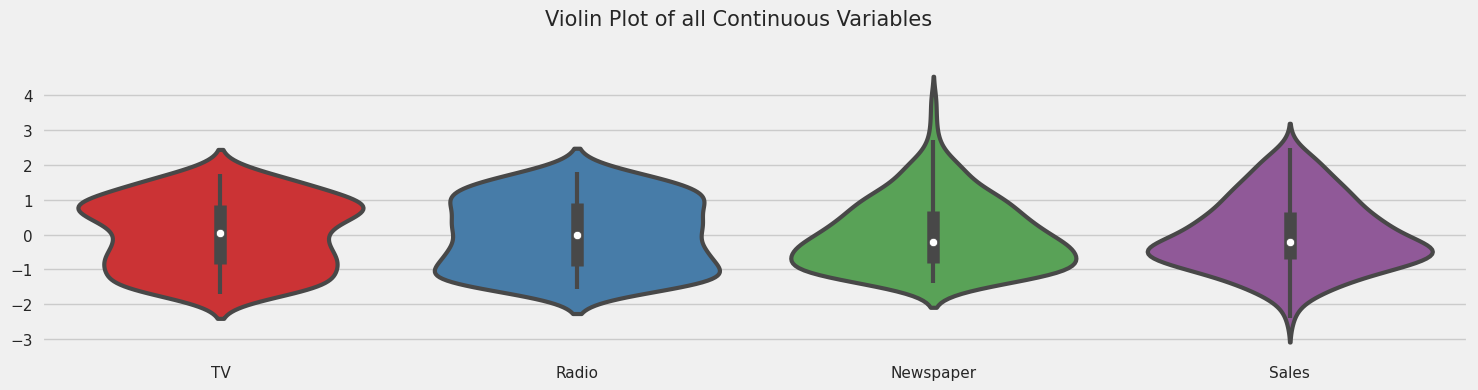

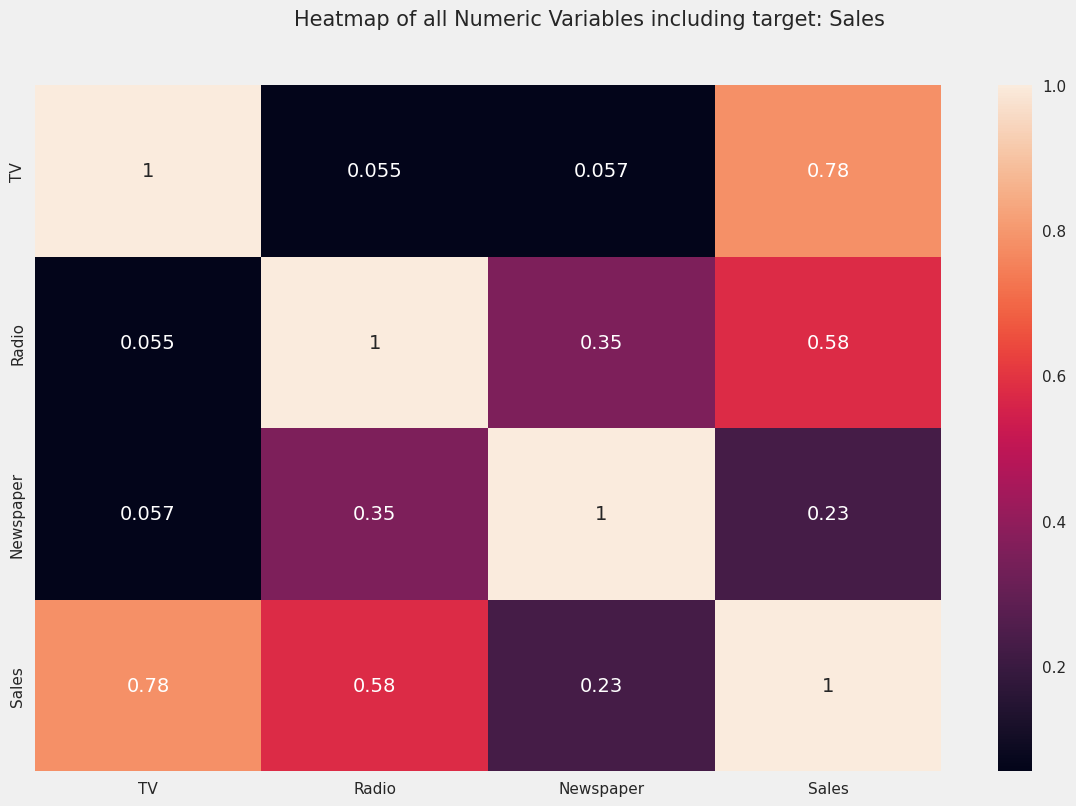

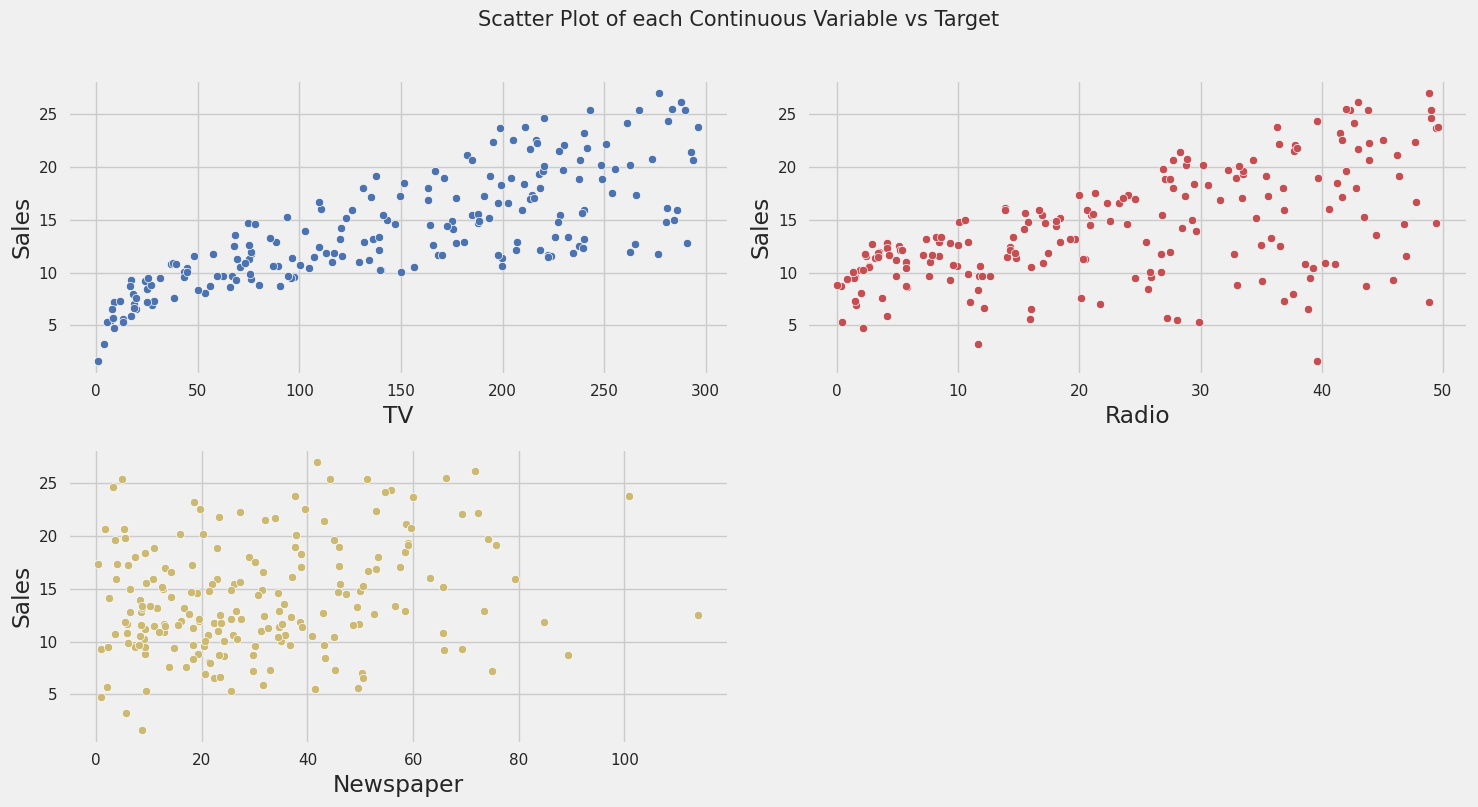

Number of All Scatter Plots = 6


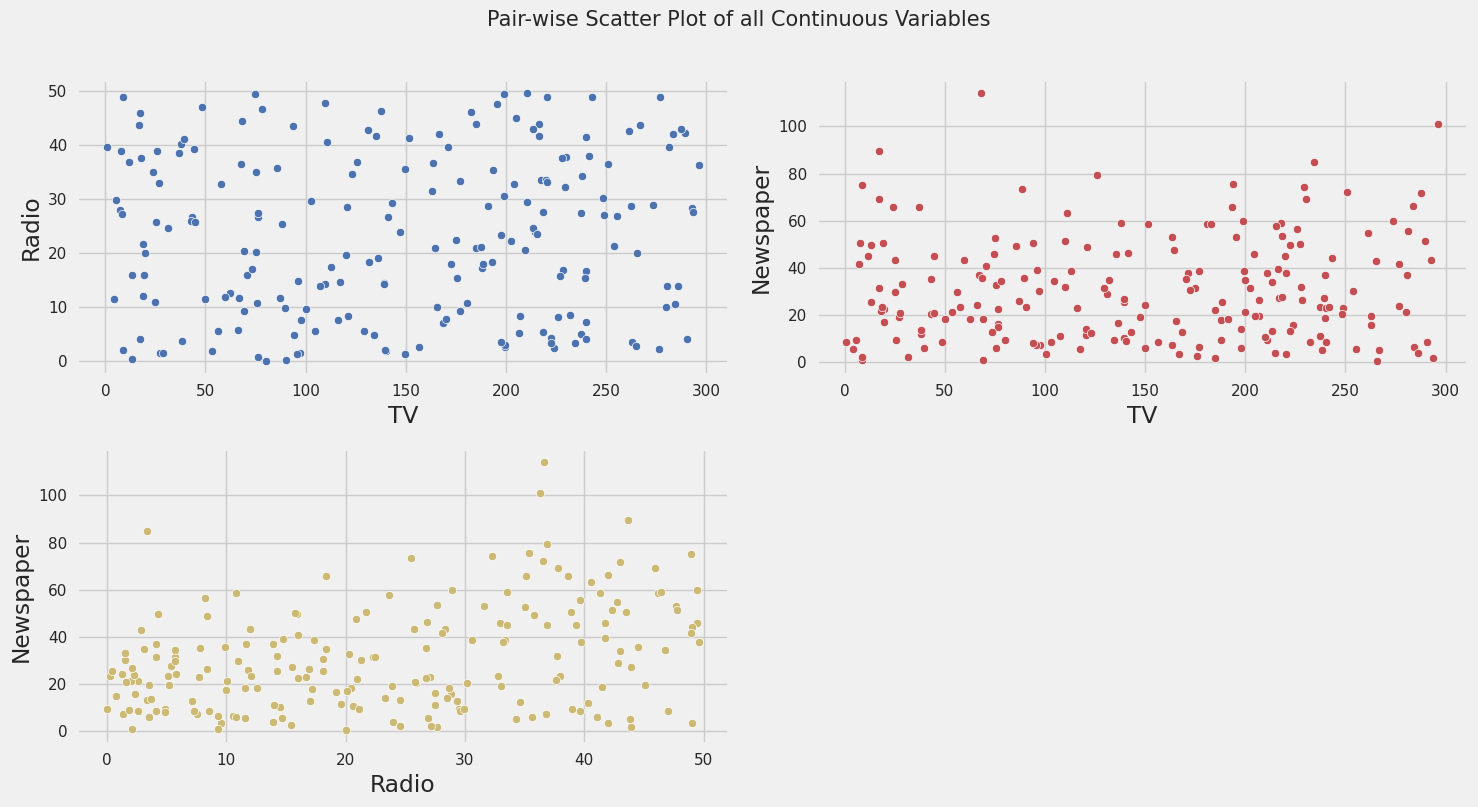

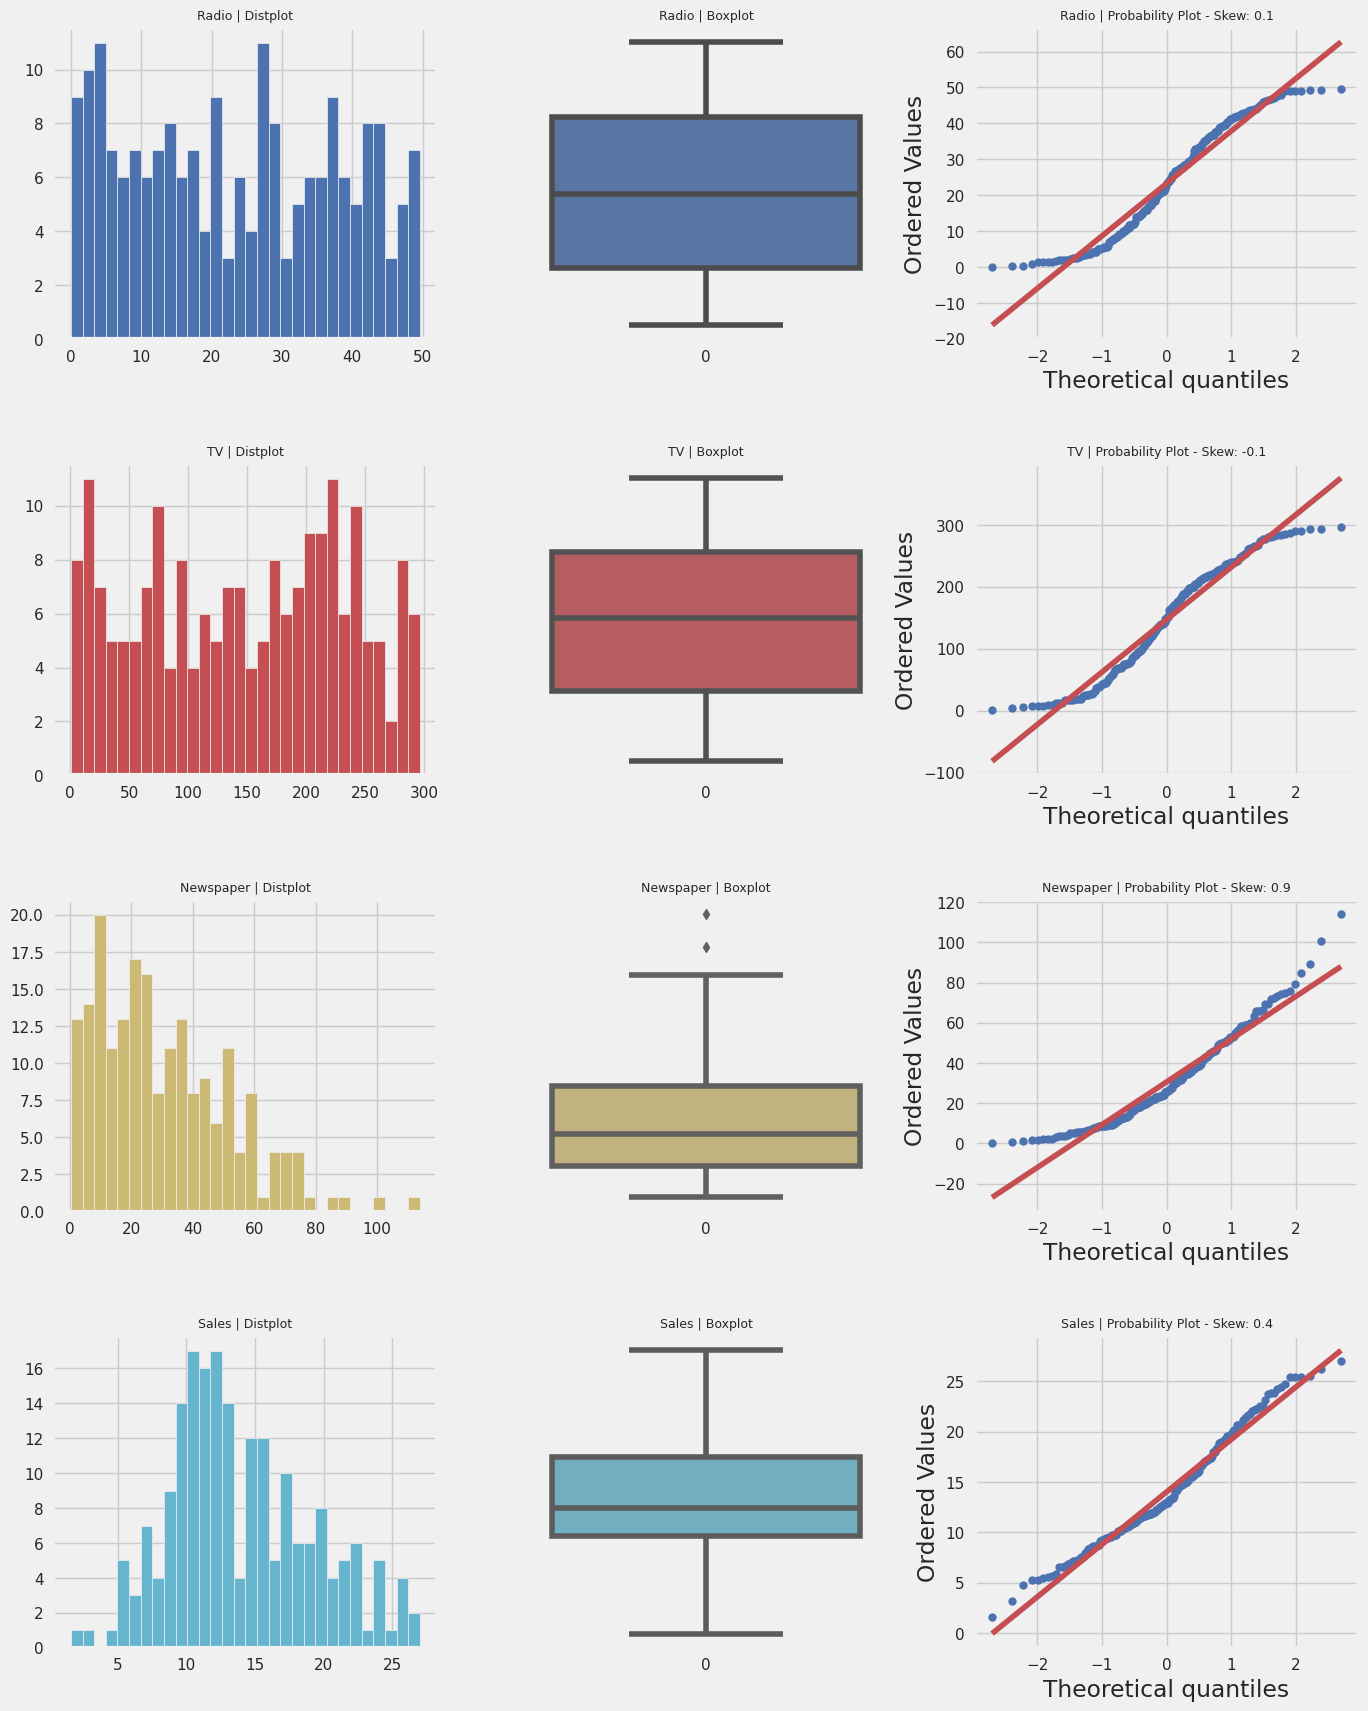

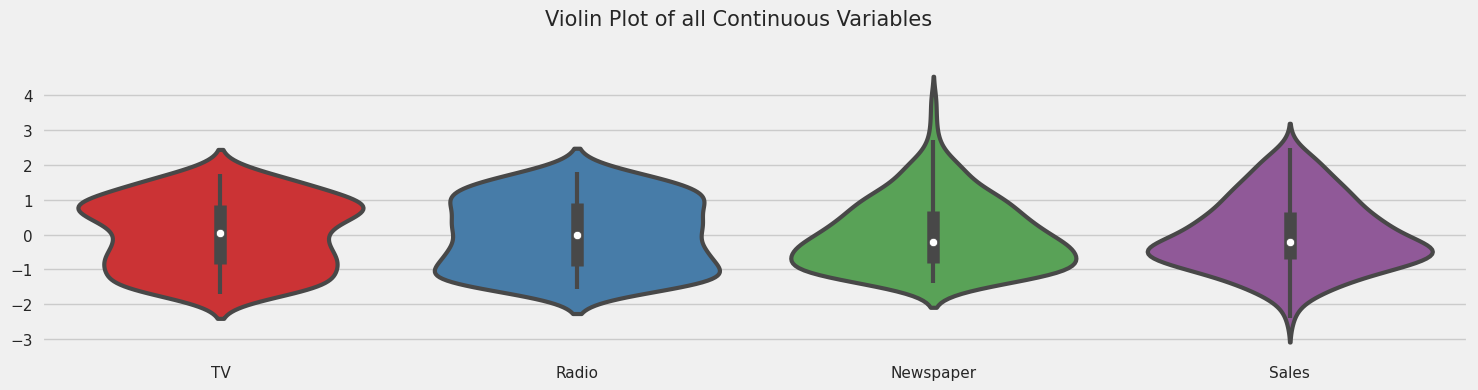

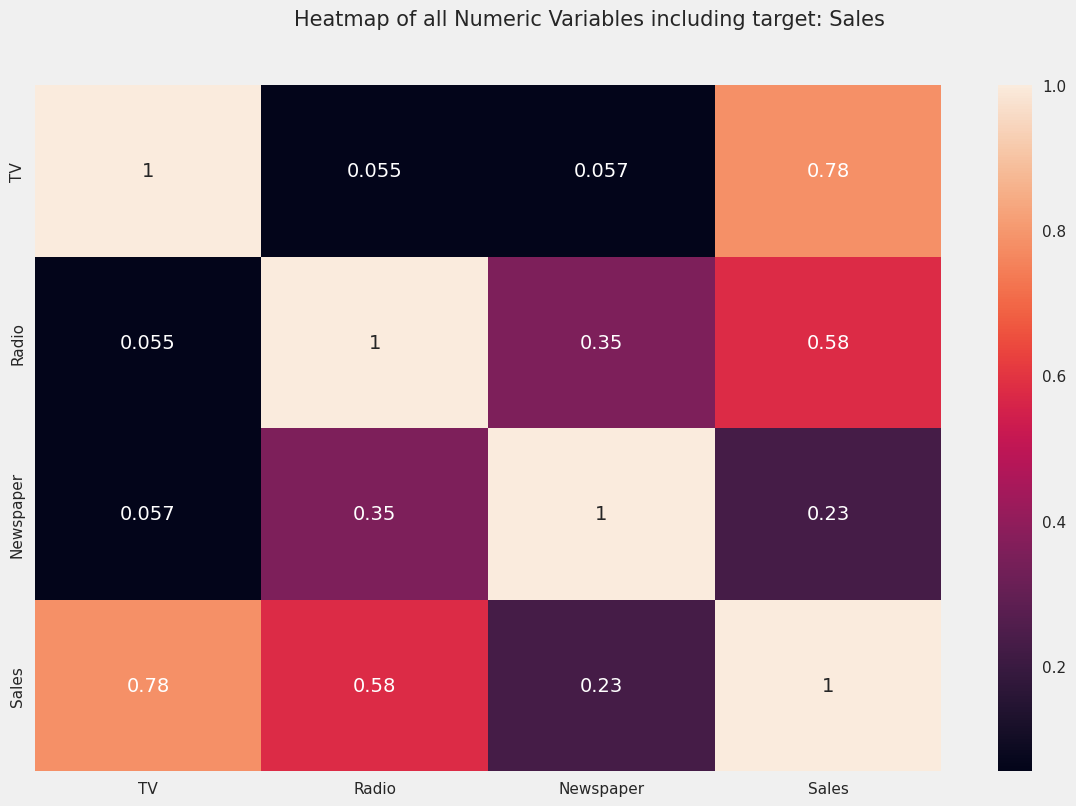

All Plots done
Time to run AutoViz = 15 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

# Assuming df is your DataFrame and sales is our target variable
AV = AutoViz_Class()
df = AV.AutoViz(
    filename='',
    sep=',',
    depVar='Sales',
    dfte=df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format='svg',
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)


# Split the data and find the best suitable model

In [ ]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [ ]:
X.shape

(200, 3)

In [ ]:
y.shape

(200,)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
!pip install lazypredict


In [ ]:
from lazypredict.Supervised import LazyRegressor

In [ ]:
reg= LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

In [ ]:
models = reg.fit(X_train,X_test,y_train,y_test)

In [ ]:
print(models)

(                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                   0.99           0.99     0.45     0.11   
RandomForestRegressor                 0.98           0.98     0.69     0.18   
XGBRegressor                          0.98           0.98     0.70     0.10   
BaggingRegressor                      0.98           0.98     0.74     0.03   
GradientBoostingRegressor             0.98           0.98     0.75     0.09   
DecisionTreeRegressor                 0.96           0.96     0.97     0.01   
HistGradientBoostingRegressor         0.96           0.96     1.01     0.10   
LGBMRegressor                         0.95           0.96     1.03     0.13   
AdaBoostRegressor                     0.95           0.96     1.06     0.11   
ExtraTreeRegressor                    0.95           0.96     1.06     0.01   
PoissonRegressor                      0.92         

# We can see that the top 5 regressor models gave an accuracy score more than 98%


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.9175057618627588

In [ ]:
result = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [ ]:
result.head()

,Actual,Predicted
135,11.60,13.74
127,8.80,6.47
191,9.90,8.24
66,9.50,8.78
119,6.60,6.73


In [ ]:
result.shape

(50, 2)

In [ ]:
px.scatter(result,x='Actual',y='Predicted',trendline='ols')

#Save , Dump and load the model

In [ ]:
import pickle

In [ ]:
with open('regressor.pkl','wb') as f:
  pickle.dump(model,f)

In [ ]:
with open('regressor.pkl','rb') as f:
  loaded_model = pickle.load(f)